In [62]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
import cv2 as cv


## Processing audio

In [63]:

audio_file = "/home/raghavendra/Audio_Video_processing/MFCC_extraction/input_audio.wav"

In [64]:
ipd.Audio(audio_file)

## 13 MFCC feature extracted for entire audio

In [65]:
signal,sr = librosa.load(audio_file)

In [66]:
signal.shape

(163229,)

In [67]:
mfccs = librosa.feature.mfcc(signal,n_mfcc=13,sr=16000)

In [68]:
mfccs.shape

(13, 319)

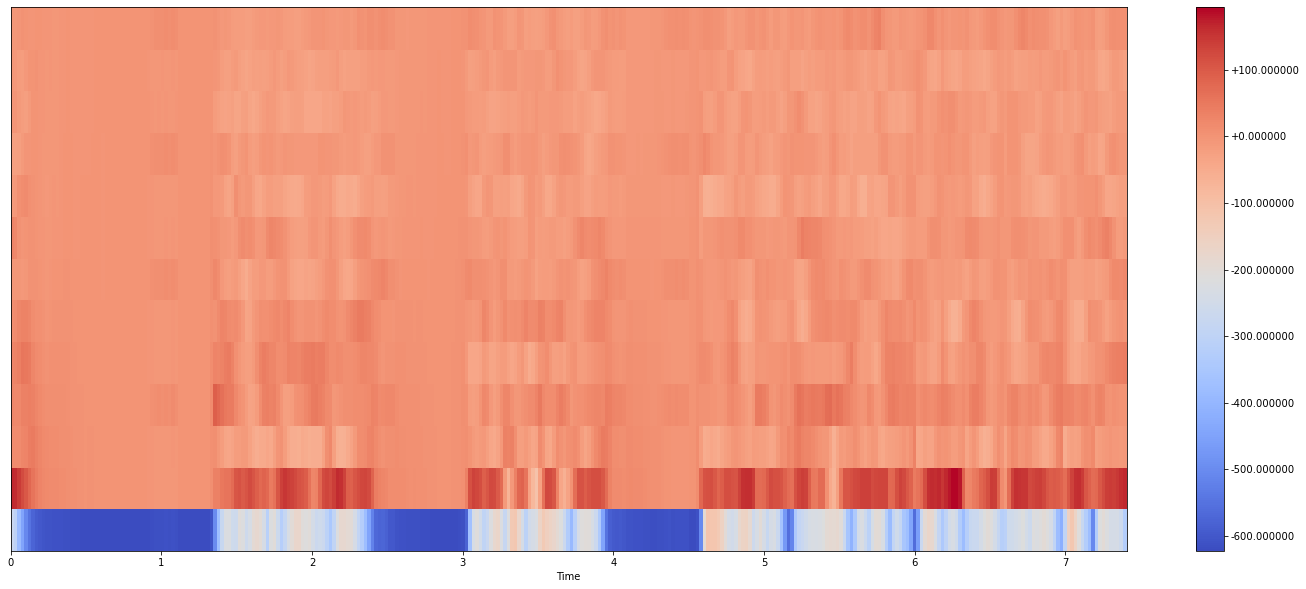

In [69]:
plt.figure(figsize=(25,10))
librosa.display.specshow(mfccs,x_axis="time",sr=sr)
plt.colorbar(format="%+2f")
plt.show()

## Now we need to get mfcc for each audio that corresponds to frames from the video. (for 25 fps)

In [ ]:
audio, sr = librosa.load(audio_file)

# Get samples for 0.04 s split for fps=25 each corresponding audio_part will be 1/25 which is 0.04
buffer = int(0.04 * sr)

samples_total = len(audio)
samples_wrote = 0
counter = 1

while samples_wrote < samples_total:

    
    if buffer > (samples_total - samples_wrote):
        buffer = samples_total - samples_wrote

    block = audio[samples_wrote : (samples_wrote + buffer)]
    out_filename = "/home/raghavendra/Audio_Video_processing/MFCC_extraction/" + str(counter) + ".wav"

    
    sf.write(out_filename, block, sr)
    counter += 1
    samples_wrote += buffer

In [ ]:
#now we have 186 frames and 186 wav files

In [55]:
mfcc_extraction = []
for i in range(1,187):
    audio, sr = librosa.load("/home/raghavendra/Audio_Video_processing/MFCC_extraction/"+str(i)+".wav")
    mfcc = librosa.feature.mfcc(audio,n_mfcc=13,sr=16000)
    mfcc_extraction.append(mfcc)

In [56]:
len(mfcc_extraction)

186

## visuaizing first and the last extracted feature

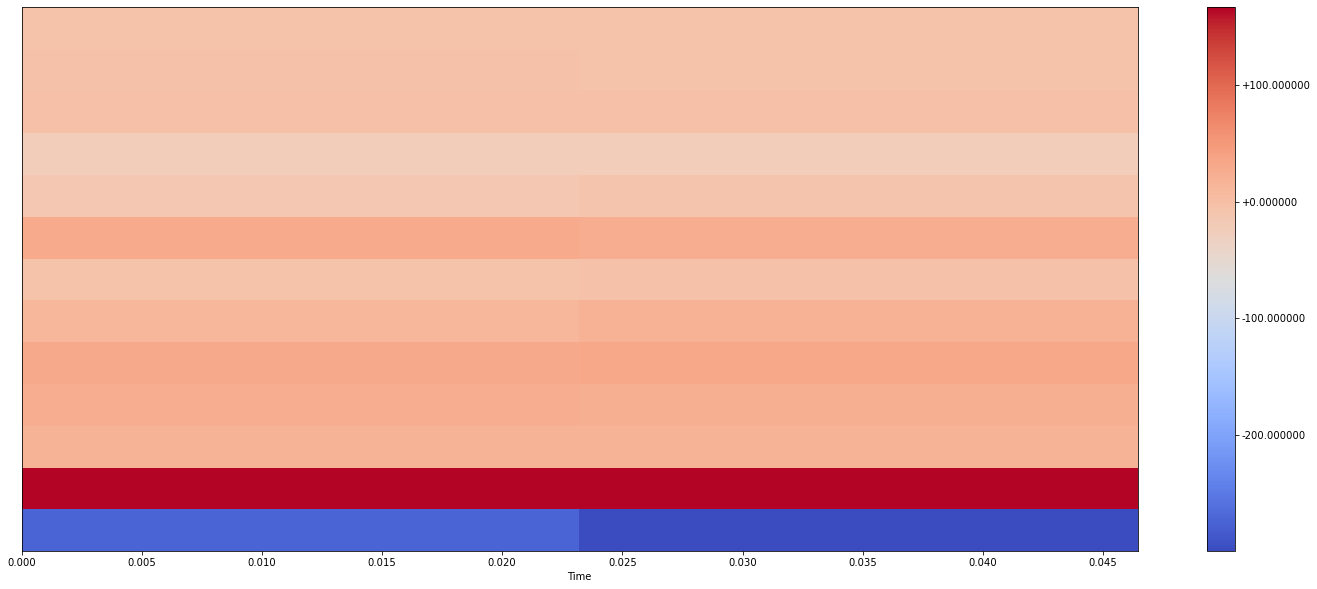

In [38]:
plt.figure(figsize=(25,10))
librosa.display.specshow(mfcc_extraction[0],x_axis="time",sr=sr)
plt.colorbar(format="%+2f")
plt.show()

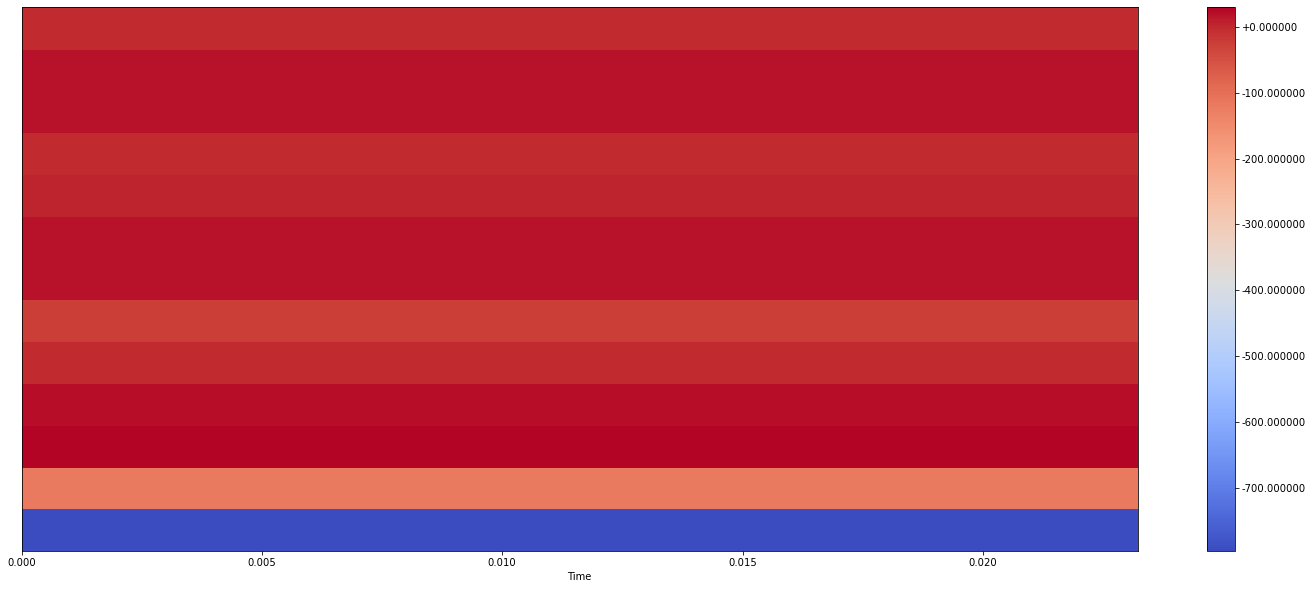

In [57]:
plt.figure(figsize=(25,10))
librosa.display.specshow(mfcc_extraction[-1],x_axis="time",sr=sr)
plt.colorbar(format="%+2f")
plt.show()

## extracting corresponding 186 frames

In [58]:
video = cv.VideoCapture("/home/raghavendra/Audio_Video_processing/Frame_extraction/input_vid.mp4")
i = 1
while True:
    isTrue, frame = video.read()
    if isTrue == False:
        break
    
    cv.imwrite('/home/raghavendra/Audio_Video_processing/Frame_extraction/frames/'+str(i)+'.jpg', frame)

    i += 1

video.release()
cv.destroyAllWindows()

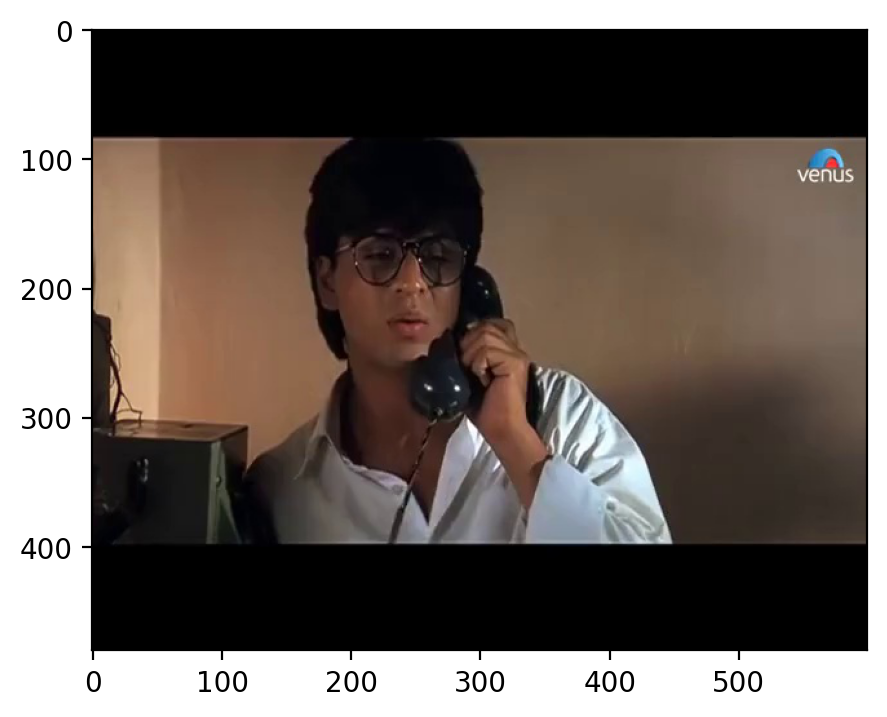

In [59]:
#visualizing frame and correspondong mfcc
import matplotlib.image as mpimg
plt.figure(dpi=200,figsize=(5,5))
image = mpimg.imread("/home/raghavendra/Audio_Video_processing/Frame_extraction/frames/1.jpg")
plt.imshow(image)



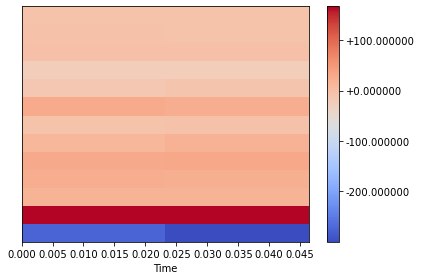

In [60]:

librosa.display.specshow(mfcc_extraction[0],x_axis="time",sr=sr)
plt.colorbar(format="%+2f")
plt.tight_layout()
plt.show()